## Importing Libraries 

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## Data Exploration

In [125]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [127]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [128]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [129]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


Null Values in "Customer ID"

In [130]:
df['Customer ID'].isna().sum()

107927

In [131]:
df[df['Quantity'] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [132]:
(df['Quantity'] < 0).sum()

12326

We have got the negative Quantity as well...


In [133]:
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


Since "Invoice" also Got Alphabet as well, so we will look at total unique Alphabets

In [134]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [135]:
df['Invoice'].str.startswith("A").sum()

3

In [136]:
df['Invoice'].str.startswith("C").sum()

10206

Now Checking the "StockCode" Columnn

In [137]:
df['StockCode'] = df['StockCode'].astype("str")
df[(df['StockCode'].str.match("^\\d{5}$")==False) & (df['StockCode'].str.match("^\\d{5}[a-zA-z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

These StockCodes does not follow the Mentioned pattern of 5 digits ending with alphabet

In [138]:
((df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+") == False)).sum()

3097

So There are 3097 Row that does not follow the given "StockCode" Patterns

In [139]:
df[df['StockCode'].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [140]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [141]:
df[df['StockCode'].str.contains("^DCGS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [142]:
df[df['StockCode'].str.contains("^D")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [143]:
df[df['StockCode'].str.contains("^M")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom


In [144]:
df[df['StockCode'].str.contains("^C2")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.0,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom


In [145]:
df[df['StockCode'].str.contains("^C3")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.0,NaN,United Kingdom


In [146]:
df[df['StockCode'].str.contains("^S")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom


In [147]:
df[df['StockCode'].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


In [148]:
df[df['StockCode'].str.contains("^SP1002")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [149]:
df[df['StockCode'].str.contains("^AMAZONFEE")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


## Notes

### StockCode Analysis  
The **StockCode** field is primarily expected to follow the pattern `[0-9]{5}` but also contains legitimate values matching `[0-9]{5}[a-zA-Z]+`. Additionally, there are other values with specific meanings that require classification for clustering.

#### StockCode Categories and Actions  

| **Code**       | **Description**                                                        | **Action**                  |  
|---------------|------------------------------------------------------------------------|-----------------------------|  
| **DCGS**      | Appears valid; some quantities are negative, and Customer ID is null.  | Exclude from clustering     |  
| **D**         | Represents discount values.                                           | Exclude from clustering     |  
| **DOT**       | Represents postage charges.                                           | Exclude from clustering     |  
| **M or m**    | Represents manual transactions.                                       | Exclude from clustering     |  
| **C2**        | Carriage transaction (meaning unclear).                              | Exclude from clustering     |  
| **C3**        | Only one transaction, purpose unclear.                               | Exclude                     |  
| **BANK CHARGES or B** | Represents bank charges.                                    | Exclude from clustering     |  
| **S**         | Represents samples sent to customers.                                | Exclude from clustering     |  
| **TESTXXX**   | Testing data, not valid.                                             | Exclude from clustering     |  
| **gift__XXX** | Purchases made with gift cards, lacks customer data.                 | Exclude                     |  
| **PADS**      | Appears to be a legitimate stock code for padding.                   | Include                     |  
| **SP1002**    | Appears to be a special request item; only two transactions exist. Three seem valid, but one has zero pricing. | Exclude for now |  
| **AMAZONFEE** | Likely fees related to Amazon shipping or services.                  | Exclude for now             |  
| **ADJUSTX**   | Seems to be manual account adjustments by admins.                    | Exclude for now             |  




# Data Cleaning

In [166]:
cleaned_df = df.copy()

In [167]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype("str")
mask = (cleaned_df['Invoice'].str.match("^\\d{6}$") == True)

In [168]:
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [170]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype("str")
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) |
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)|
    (cleaned_df['StockCode'].str.match("^PADS$") == True)    
    )

In [171]:
cleaned_df = cleaned_df[mask]

In [172]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [177]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_2524\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [178]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [182]:
(cleaned_df['Price'] <= 0.0).sum()

28

In [183]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.0]

Now checking How much of the percentage Data has been dropped..

In [193]:
print("Data Dropped =",100 - len(cleaned_df)/len(df)*100, "%")

Data Dropped = 22.675707616740354 %


# Feature Engineering

Creating New Feature, "SalesTotal", Having total sales for each Row

In [194]:
cleaned_df["SalesTotal"] = cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df

C:\Users\parth\AppData\Local\Temp\ipykernel_2524\387517323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesTotal"] = cleaned_df['Quantity']*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


Now Grouping the data according to the "Customer ID" as single Customer ID may  have multiple Purchases, on different dates.

In [208]:
agg_df = cleaned_df.groupby(by="Customer ID", as_index=False).agg(
    TotalSpend = ("SalesTotal", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoiceDate = ("InvoiceDate", "max")    
)
agg_df

,Customer ID,TotalSpend,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00
4281,18284.0,411.68,1,2010-10-04 11:33:00
4282,18285.0,377.00,1,2010-02-17 10:24:00
4283,18286.0,1246.43,2,2010-08-20 11:57:00


In [209]:
agg_df[agg_df['Frequency'] == max(agg_df['Frequency'])]

,Customer ID,TotalSpend,Frequency,LastInvoiceDate
1820,14911.0,140378.89,183,2010-12-09 12:17:00


Bro is the most valuable customer ;-)

In [213]:
maxInvDt = agg_df["LastInvoiceDate"].max() 
# Selecting the max date of the given data as present date, not current date as
# the data is from 2009, Old already....
agg_df["Recency"] = (maxInvDt - agg_df["LastInvoiceDate"]).dt.days
agg_df.head()

,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


Histogram for distribution

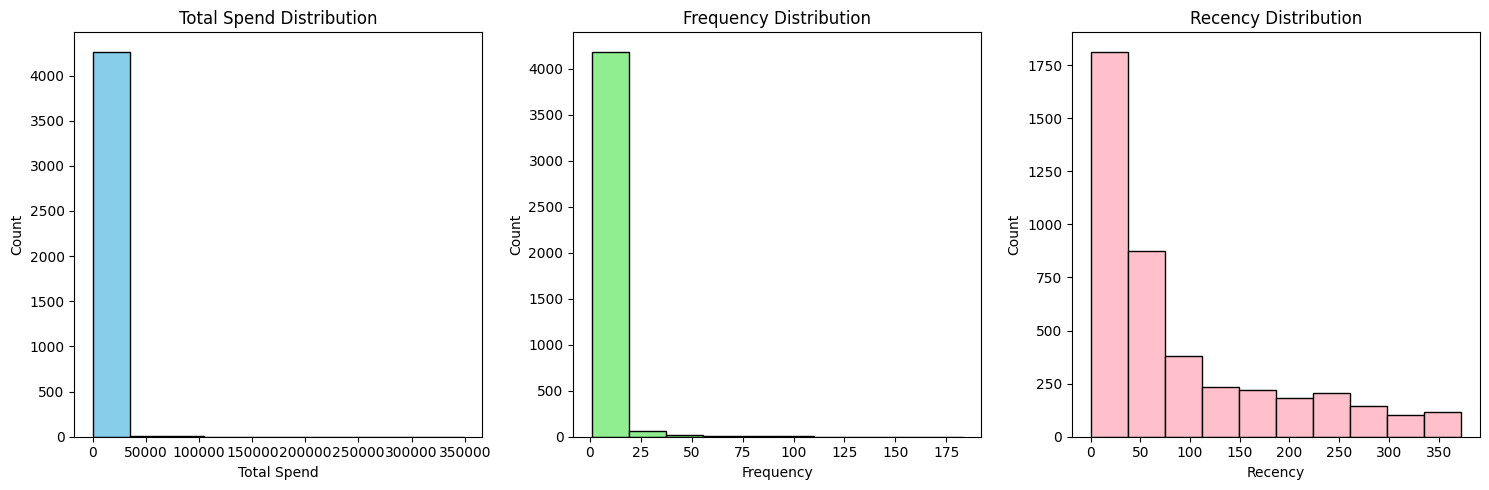

In [222]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(agg_df['TotalSpend'], color='skyblue', edgecolor = 'black')
plt.title("Total Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(agg_df['Frequency'], color = 'lightgreen', edgecolor = 'black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(agg_df['Recency'], color='pink', edgecolor = 'black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


BoxPlot for Outlier Detection

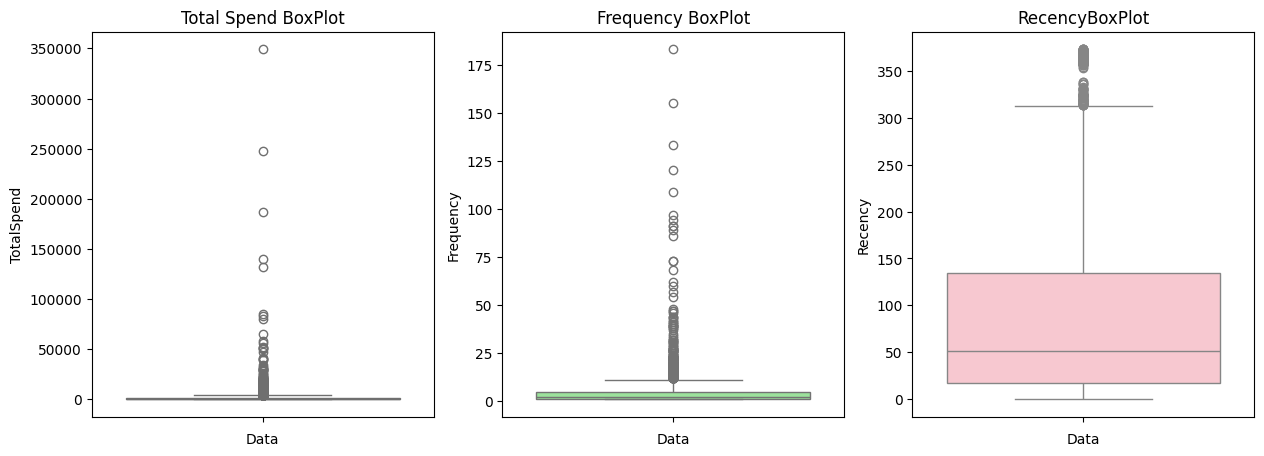

In [235]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(agg_df['TotalSpend'], color='skyblue')
plt.title('Total Spend BoxPlot')
plt.xlabel("Data")

plt.subplot(1, 3, 2)
sns.boxplot(agg_df['Frequency'], color='lightgreen')
plt.title('Frequency BoxPlot')
plt.xlabel("Data")

plt.subplot(1, 3, 3)
sns.boxplot(agg_df['Recency'], color='pink')
plt.title('RecencyBoxPlot')
plt.xlabel("Data")

plt.show()

Outliers are many here,
Now we will create dataframe with respect to the outliers in each attribute 

#### TOTAL SPENDS OUTLIERS - 

In [228]:
TS_Q1 = agg_df['TotalSpend'].quantile(0.25)
TS_Q3 = agg_df['TotalSpend'].quantile(0.75)
TS_IQR = TS_Q3 - TS_Q1
TotalSpend_Outliers_df = agg_df[(agg_df['TotalSpend'] > TS_Q3 + 1.5*TS_IQR ) | (agg_df['TotalSpend'] < TS_Q1 - 1.5*TS_IQR)]

TotalSpend_Outliers_df.describe()

,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


#### FREQUENCY OUTLIERS - 

In [247]:
F_Q1 = agg_df['Frequency'].quantile(0.25)
F_Q3 = agg_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequency_Outlier_df = agg_df[(agg_df['Frequency'] > F_Q3 + 1.5*F_IQR)|(agg_df['Frequency'] < F_Q1 - 1.5*F_IQR)]
Frequency_Outlier_df.describe()

,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


#### RECENCY OUTLIERS - 

In [230]:
R_Q1 = agg_df['Recency'].quantile(0.25)
R_Q3 = agg_df['Recency'].quantile(0.75)
R_IQR = R_Q3 - R_Q1

Recency_Outlier_df = agg_df[(agg_df['Recency'] > R_Q1 + 1.5*R_IQR)|(agg_df['Recency'] < R_Q1 - 1.5*R_IQR)]
Recency_Outlier_df.describe()

,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency
count,735.000000,735.000000,735.000000,735,735.000000
mean,15433.531973,599.381693,1.546939,2010-03-13 02:50:26.367346944,271.423129
min,12355.000000,1.550000,1.000000,2009-12-01 10:49:00,195.000000
25%,14028.500000,166.050000,1.000000,2010-02-03 13:56:30,226.000000
50%,15423.000000,299.830000,1.000000,2010-03-23 12:13:00,261.000000
75%,16912.000000,508.375000,2.000000,2010-04-27 11:56:30,309.000000
max,18285.000000,34023.260000,27.000000,2010-05-28 15:12:00,373.000000
std,1701.251497,1740.994605,1.424834,NaN,53.422732


In [248]:
non_outliers_df = agg_df[(~agg_df.index.isin(TotalSpend_Outliers_df.index)) & (~agg_df.index.isin(Frequency_Outlier_df.index))]

non_outliers_df.describe()


,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


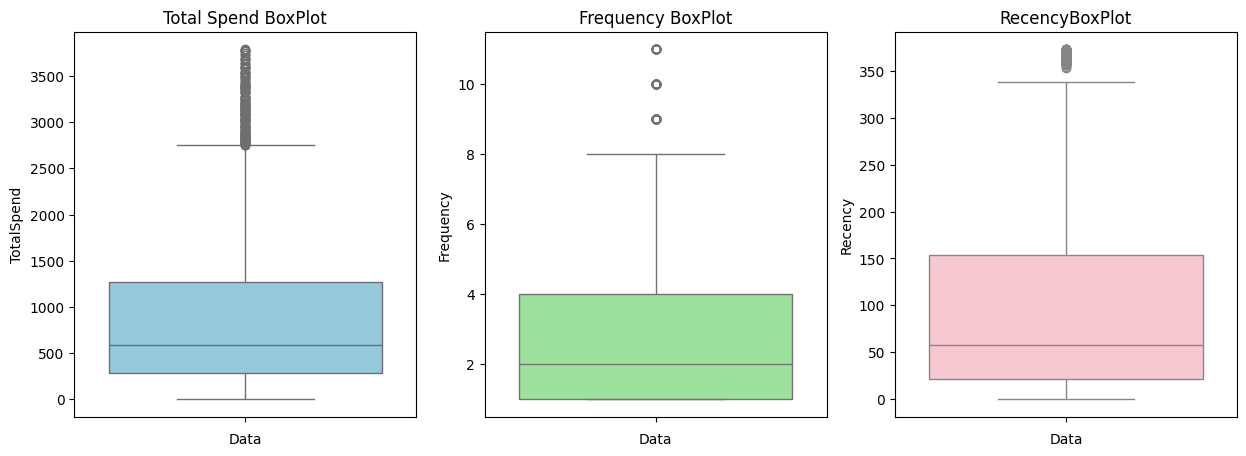

In [249]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_df['TotalSpend'], color='skyblue')
plt.title('Total Spend BoxPlot')
plt.xlabel("Data")

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency BoxPlot')
plt.xlabel("Data")

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df['Recency'], color='pink')
plt.title('RecencyBoxPlot')
plt.xlabel("Data")

plt.show()

3D Scatter Plot of Customer Data

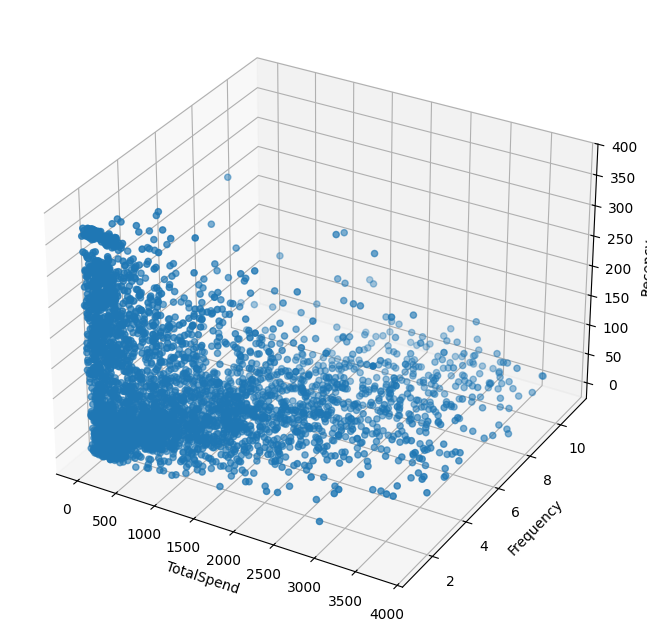

In [250]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter( non_outliers_df['TotalSpend'], non_outliers_df['Frequency'], non_outliers_df['Recency'])
ax.set_ylabel('Frequency')
ax.set_xlabel('TotalSpend')
ax.set_zlabel('Recency')

plt.show()


In [251]:
scaler = StandardScaler()
Scaled_data = scaler.fit_transform(non_outliers_df[['TotalSpend', 'Frequency', 'Recency']])
Scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [252]:

Scaled_data_df = pd.DataFrame(Scaled_data, index=non_outliers_df.index, columns=['TotalSpend', 'Frequency', 'Recency'])
Scaled_data_df.head()

,TotalSpend,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


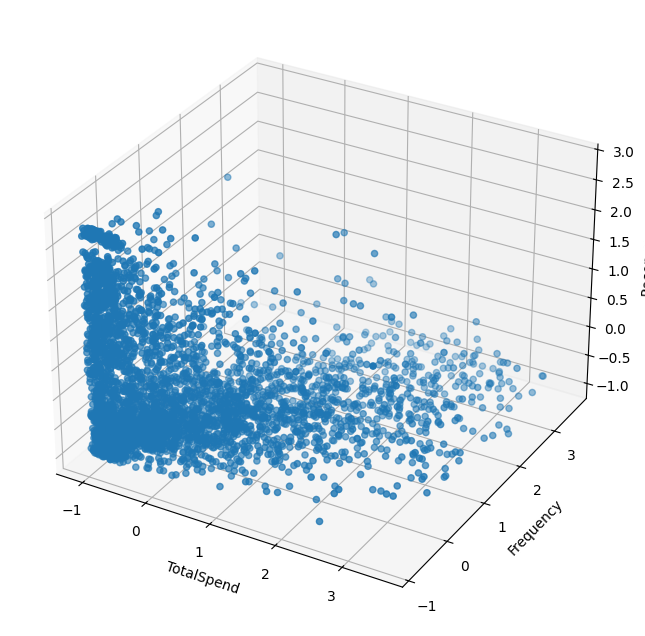

In [253]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(Scaled_data_df['TotalSpend'],Scaled_data_df['Frequency'],Scaled_data_df['Recency'])

ax.set_ylabel('Frequency')
ax.set_xlabel('TotalSpend')
ax.set_zlabel('Recency')

plt.show()

# KMean Clustering

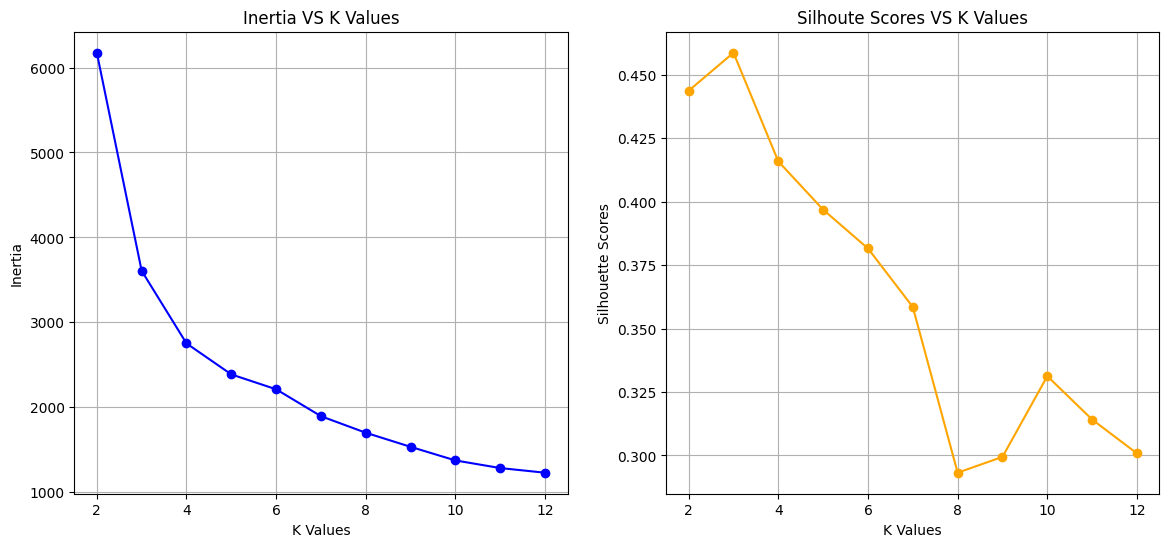

In [254]:
inertia = []
sil_Scores = []
k_values = range(2, 13)
for k in range (2, 13):
    kmeans = KMeans(n_clusters = k, max_iter= 12, random_state = 42)
    cluster_Label_Pred = kmeans.fit_predict(Scaled_data_df)
    sil_score = silhouette_score(Scaled_data_df, cluster_Label_Pred)
    sil_Scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o', color = 'blue')
plt.title("Inertia VS K Values")
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, sil_Scores, marker = 'o', color = 'orange')
plt.title("Silhoute Scores VS K Values")
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores")
plt.grid(True)

plt.show()

By looking at the plot, K = 4 looks Perfect

# Silhouette Score

This is the silhouette score formula: $s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$.


Where:

- \( s(i) \) is the silhouette score for a single sample \( i \)
- \( a(i) \) is the average distance between \( i \) and all other points in the same cluster,
- \( b(i) \) is the minimum average distance between \( i \) and all points in the nearest cluster to which \( i \) does not belong.

The silhouette score ranges between \([-1,1]\), a higher value indicates more distinct clusters.


In [259]:
kmeans = KMeans(n_clusters= 4, random_state= 42, max_iter= 1000)
cluster_Label_Pred = kmeans.fit_predict(Scaled_data_df)
cluster_Label_Pred

array([1, 0, 2, ..., 1, 0, 0])

In [260]:
non_outliers_df['Clusters'] = cluster_Label_Pred
non_outliers_df

C:\Users\parth\AppData\Local\Temp\ipykernel_2524\3169617708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Clusters'] = cluster_Label_Pred


,Customer ID,TotalSpend,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


In [263]:
non_outliers_df['Clusters'].value_counts()

Clusters
2    1499
0     914
1     902
3     494
Name: count, dtype: int64

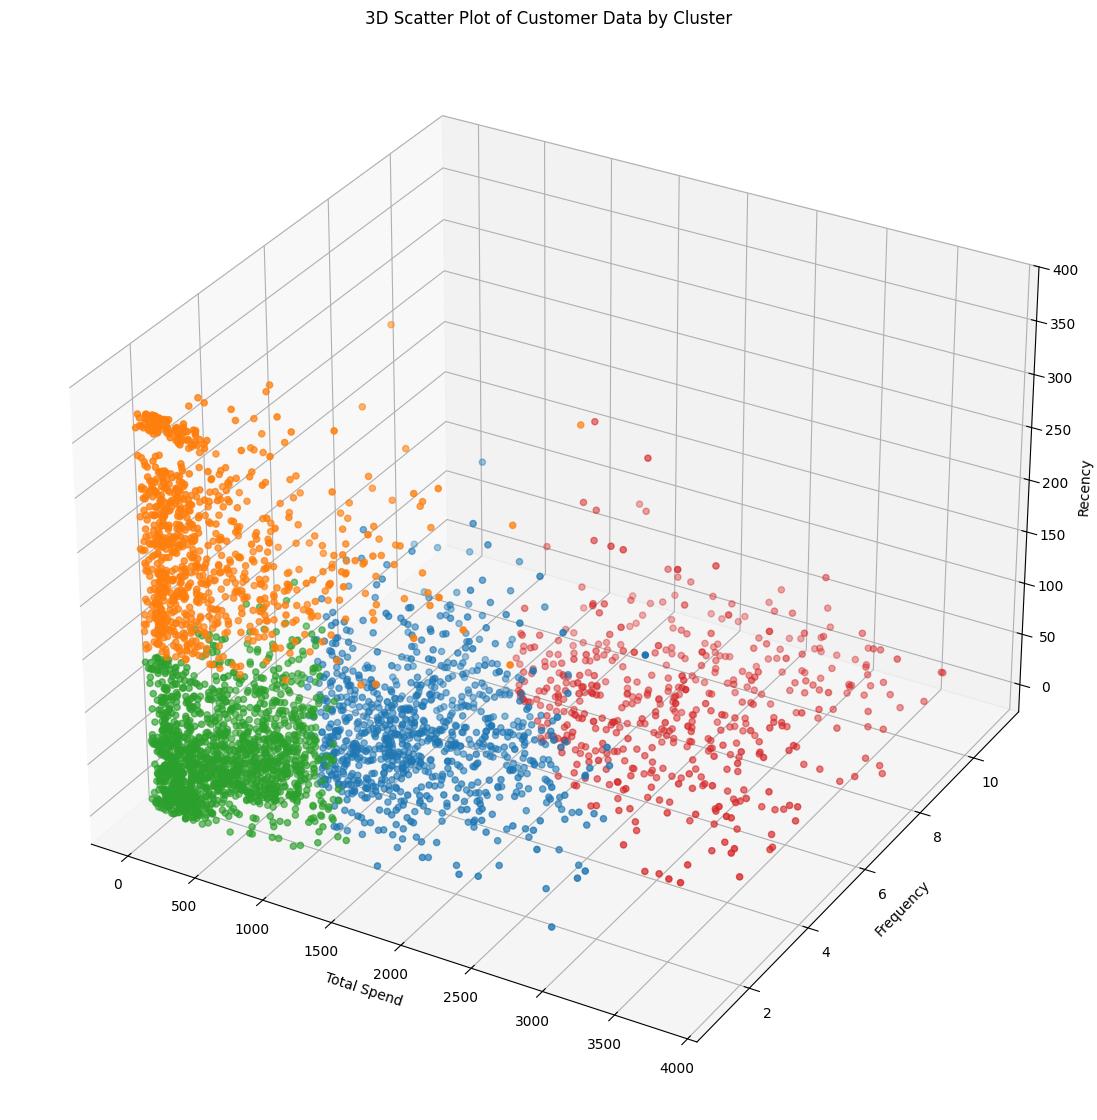

In [267]:

cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red
color = non_outliers_df['Clusters'].map(cluster_colors)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_df['TotalSpend'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=color,
                     marker='o')

ax.set_xlabel('Total Spend')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

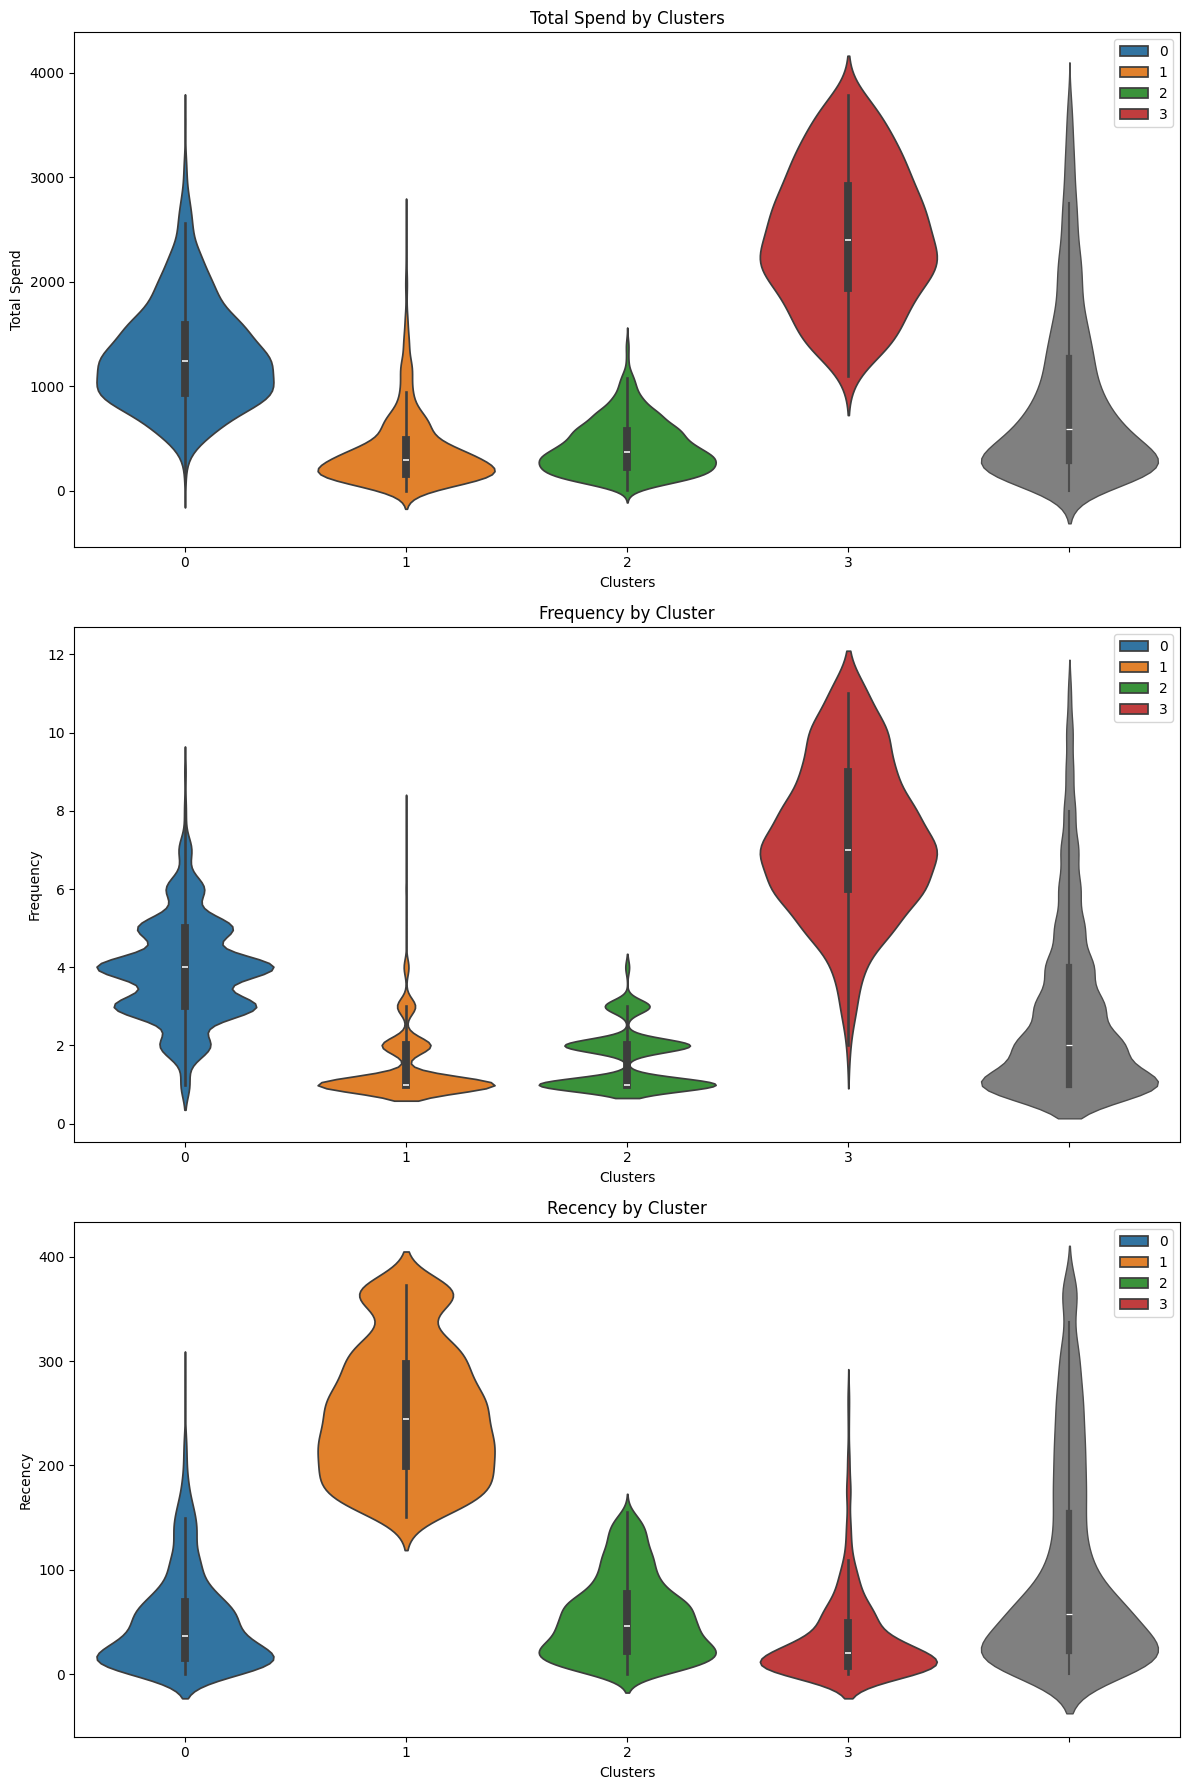

In [274]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df['Clusters'], y = non_outliers_df['TotalSpend'], palette= cluster_colors, hue=non_outliers_df['Clusters'])
sns.violinplot(y = non_outliers_df['TotalSpend'], color='gray', linewidth=1.0)
plt.title('Total Spend by Clusters')
plt.ylabel('Total Spend')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Clusters'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Clusters'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Customer Clusters and Actions Summary

### **Cluster 0 (Blue): "Retain"**  
**Rationale:**  
This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.  

**Action:**  
- Implement loyalty programs  
- Provide personalized offers  
- Regular engagement to ensure they remain active  

---

### **Cluster 1 (Orange): "Re-Engage"**  
**Rationale:**  
This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.  

**Action:**  
- Use targeted marketing campaigns  
- Offer special discounts  
- Send reminders to encourage them to return and purchase again  

---

### **Cluster 2 (Green): "Nurture"**  
**Rationale:**  
This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.  

**Action:**  
- Focus on building relationships  
- Provide excellent customer service  
- Offer incentives to encourage more frequent purchases  

---

### **Cluster 3 (Red): "Reward"**  
**Rationale:**  
This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.  

**Action:**  
- Implement a robust loyalty program  
- Provide exclusive offers  
- Recognize their loyalty to keep them engaged and satisfied  
